<a href="https://colab.research.google.com/github/Cvelsen22/Carmelo-Velez---Data-Analysis-Portfolio/blob/main/hourly_wages_prediction_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wages per hour prediction: Neuronal Networks with Keras API Case study

In this project, we aim to build a predictive model using Keras to estimate an individual's wage per hour. The dataset encompasses a variety of socio-economic factors that may influence wage earnings. The target variable, "wage per hour," serves as our focal point for prediction.

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

In [17]:
#libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
# Now you can use Keras modules and classes
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from urllib.request import urlretrieve
import matplotlib.pyplot as plt

# About the data...

* **Union Membership (union)**: Binary variable indicating whether an individual is a member of a labor union. Union membership can impact wages through collective bargaining and negotiated agreements.

* **Education Years (education years)**: Represents the number of years of education an individual has completed. Education is a fundamental determinant of wages, often reflecting skills and qualifications.

* **Experience Years (experience year)**: Denotes the number of years an individual has spent in the workforce. Work experience is a crucial factor influencing wage levels, capturing on-the-job learning and expertise.

* **Age**: The age of the individual, which can correlate with experience and career progression. Older individuals may command higher wages due to accumulated expertise.

* **Gender (female)**: Binary variable indicating the gender of the individual (1 for female, 0 for male). Gender is considered due to existing wage disparities that may result from gender-based discrimination.

* **Marital Status (marr)**: Binary variable indicating whether an individual is married (1 for married, 0 for not married). Marital status can affect household income and financial responsibilities.

* **Region (south)**: Binary variable indicating whether the individual resides in the southern region (1 for south, 0 for not south). Regional differences can influence cost of living and wage scales.

* **Industry Type - Manufacturing and Construction**: Binary variables indicating whether the individual works in the manufacturing or construction sector. Industry type can significantly impact wages due to variations in demand, labor market conditions, and skill requirements.

In [2]:
# Assign url of file: url
url = 'https://raw.githubusercontent.com/Cvelsen22/data_files/main/hourly_wages.csv'
# Save file locally
urlretrieve(url,'hourly_wages.csv')
# Read file into a DataFrame and print its head
data = pd.read_csv('hourly_wages.csv')
data.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wage_per_hour   534 non-null    float64
 1   union           534 non-null    int64  
 2   education_yrs   534 non-null    int64  
 3   experience_yrs  534 non-null    int64  
 4   age             534 non-null    int64  
 5   female          534 non-null    int64  
 6   marr            534 non-null    int64  
 7   south           534 non-null    int64  
 8   manufacturing   534 non-null    int64  
 9   construction    534 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [4]:
data.shape

(534, 10)

In [5]:
data.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Features & Labels

In a neural network, features and labels are key components used for training and making predictions. Features are the input variables or attributes that the neural network uses to make predictions. Labels, also known as the target variable, are the output or the variable we are trying to predict. In a regression task like predicting wage per hour, the label is typically a continuous value.

In [6]:
feature_columns = data.drop(columns=['wage_per_hour']).values
label_column = data['wage_per_hour'].values

In [7]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# The test_size parameter specifies the proportion of the dataset to include in the test split
# The random_state parameter allows you to set a seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(feature_columns, label_column, test_size=0.1, random_state=42)

# Now you can use X_train and y_train for training your model
# And X_test and y_test for evaluating its performance


In [8]:
inputs = tf.constant(X_train, dtype='float64')
target = tf.constant(y_train, dtype='float64')
inputs_test = tf.constant(X_test, dtype='float64')
target_test = tf.constant(y_test, dtype='float64')

In [9]:
n_cols = inputs.shape[1]

# Building a Keras Model

The core data structures of Keras are layers and models. The simplest type of model is the Sequential model, a linear stack of layers. For more complex architectures, we use the Keras functional API, which allows to build arbitrary graphs of layers, or write models entirely from scratch via subclasssing.

Here is the Sequential model:

In [10]:
# Specify the model
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500       
                                                                 
 dense_1 (Dense)             (None, 32)                1632      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2165 (8.46 KB)
Trainable params: 2165 (8.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile your Model

A model needs to be compiled before training. We can compile our model by calling the compile method on it. The compile method receives an optimizer, which we can see as the algorithm that will be used to update our neural network weights, and a loss function, which is the function we want to minimize during training. In this case, we choose SGD as our optimizer and mean squared error as our loss function.

In [11]:
# Create learning rates: lr_to_test
lr_to_test = 0.01
# Create SGD optimizer with specified learning rate: my_optimizer
my_optimizer = SGD(lr=lr_to_test)
# Compile the model
model.compile(optimizer= my_optimizer, loss='mean_squared_error')

In [12]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience = 2)

# No train no Model

Creating a model is useless if we don't train it. We train our model by calling the fit method and passing the features, the labels and the number of epochs to train for. During an epoch, our entire training data passes through the network and the respective weight updates take place using back-propagation. As our model is being trained, we will get some output showing its progress. We can see the model is improving since the mean squared error loss is decreasing at each epoch.

In [13]:
# Fit the model
model.fit(inputs, target, validation_split = 0.1, callbacks = [early_stopping_monitor], epochs=10)

Epoch 1/10
14/14 [==============================] - 2s 41ms/step - loss: 8278569270216069915853530857472.0000 - val_loss: 29749199345411966034717442048.0000
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: 23389470343769343084302696448.0000 - val_loss: 16896833879241216121582387200.0000
Epoch 3/10
14/14 [==============================] - 0s 12ms/step - loss: 13284659158153982257875910656.0000 - val_loss: 9596997999133887474134155264.0000
Epoch 4/10
14/14 [==============================] - 0s 9ms/step - loss: 7545369422426032263277838336.0000 - val_loss: 5450865299828582826115072000.0000
Epoch 5/10
14/14 [==============================] - 0s 11ms/step - loss: 4285589494206738499530391552.0000 - val_loss: 3095962215520166488695635968.0000
Epoch 6/10
14/14 [==============================] - 0s 12ms/step - loss: 2434113255786972562382127104.0000 - val_loss: 1758432927347311214266941440.0000
Epoch 7/10
14/14 [==============================] - 0s 10ms/step - loss: 1382

# A callback you've been missing

Every time you call the fit method on a keras model there's a callback object that gets returned after the model finishes training. This is the history object. Accessing the history attribute, which is a python dictionary, we can check the saved metrics of the model during training as an array of numbers.

To get the most out of the history object we should use the validation_data parameter in our fit method, passing input_test and label_test as a tuple. The validation_split parameter can be used instead, specifying a percentage of the training data that will be left out for testing purposes. That way we not only have the training metrics but also the validation metrics.

In [32]:
print(h_callback.history.keys())

dict_keys(['loss', 'val_loss'])


In [18]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

# Loss curve

Loss tends to decrease as epochs go by. This is expected since our model is essentially learning to minimize the loss function. Epochs are shown on the X axis and loss on the Y-axis. As epochs go by our loss value decreases. After a certain amount of epochs, the value converges, meaning it no longer gets much lower than that. We've arrived at a minimum.

Epoch 1/10
15/15 [==============================] - 0s 12ms/step - loss: 326611781558420021182464.0000 - val_loss: 232836857339792041443328.0000
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 178161626639640914034688.0000 - val_loss: 127008868373639110590464.0000
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 97184365309329558994944.0000 - val_loss: 69281327529637256888320.0000
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 53012537746522959249408.0000 - val_loss: 37791875208286224515072.0000
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 28917507372754711609344.0000 - val_loss: 20614869258118069485568.0000
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 15774042342449884430336.0000 - val_loss: 11245086323277385695232.0000
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 8604492442611103039488.0000 - val_loss: 6134020349018880606208.0000
Epo

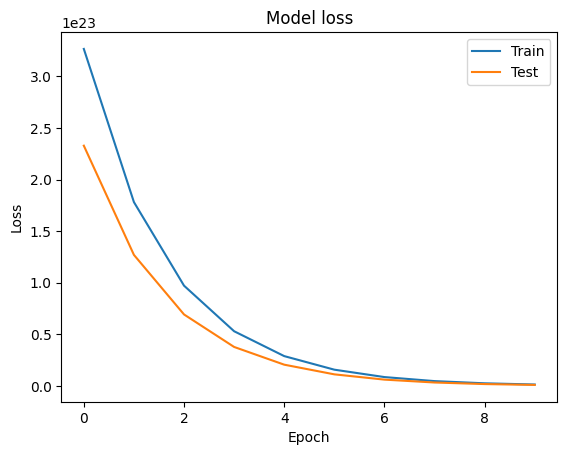

In [21]:
# Train your model and save its history
h_callback = model.fit(inputs, target, epochs = 10,
                    validation_data=(inputs_test, target_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Is the model overfitting?

If we plot training versus validation data we can identify overfitting. We will see the training and validation curves start to diverge. Overfitting is when our model starts learning particularities of our training data which don't generalize well on unseen data. The early stopping callback is useful to stop our model before it starts overfitting. For our model we can see that training and validation curves are always close to each other. Which means there is no overfitting in this model.

# Predicting

To obtain predictions from our trained model we just need to call predict on the new set of data. We can store the predictions in a variable for later use. The predictions are just numbers in a numpy array, we will interpret these depending on our dataset and problem at hand.

In [15]:
# Predict on new data
preds = model.predict(inputs_test)

2/2 [==============================] - 0s 7ms/step


# Evaluating

To quickly evaluate how well our model performs on unseen data we can use the model's evaluate method. This performs feed-forward with all samples in our test dataset (inputs_test). Feed-forward consists in computing a model's outputs from a given set of inputs. It then computes the error comparing the results to the true values stored in target_test. In this particular case, the model we trained for 10 epochs before, has a mean squared error of 1.82. Wich is Pretty good if you ask me.

In [16]:
# Evaluate your results
model.evaluate(inputs_test, target_test)

2/2 [==============================] - 0s 13ms/step - loss: 182998102231392329245130752.0000


1.8299810223139233e+26